In [36]:
from ultralytics import YOLO
from ultralytics.utils.ops import scale_image
import cv2
import numpy as np
from utils import (
    predict_on_image,
    overlay,
)
import matplotlib.pyplot as plt

In [37]:
model = YOLO('./models/last.pt')

In [32]:
res = model('./sample_images/missing_sample.jpg')


image 1/1 /Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/missing_sample.jpg: 608x640 13 Tooths, 145.2ms
Speed: 4.8ms preprocess, 145.2ms inference, 15.7ms postprocess per image at shape (1, 3, 608, 640)


In [33]:
sample_image = './sample_images/intraoral-picture.webp'
sample_image2 = './sample_images/missing_sample.jpg'

In [35]:
img =cv2.imread(sample_image2)
boxes, masks, cls, probs = predict_on_image(model, img)

# overlay masks on original image
image_with_masks = np.copy(img)
for mask_i in masks:
    image_with_masks = overlay(image_with_masks, mask_i, color=(0,255,0), alpha=0.3)
# cv2.imshow('',image_with_masks)


0: 608x640 13 Tooths, 136.1ms
Speed: 3.4ms preprocess, 136.1ms inference, 10.6ms postprocess per image at shape (1, 3, 608, 640)
(13, 608, 640)
(1040, 1120, 13)


In [62]:
image_with_masks.shape

(1040, 1120, 3)

In [63]:
masks.shape

(13, 1040, 1120)

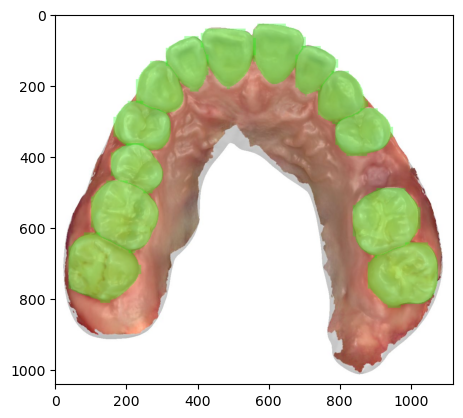

In [38]:
plt.imshow(cv2.cvtColor(image_with_masks, cv2.COLOR_BGR2RGB))


image 1/1 /Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/missing_sample.jpg: 608x640 13 Tooths, 125.6ms
Speed: 3.9ms preprocess, 125.6ms inference, 10.4ms postprocess per image at shape (1, 3, 608, 640)


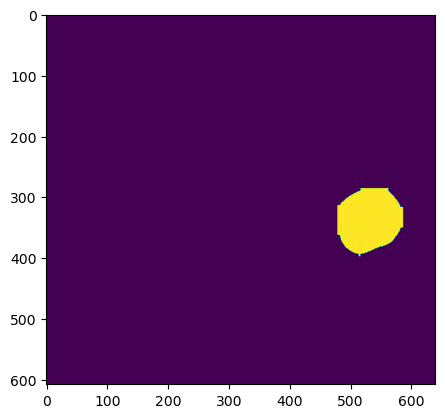

In [109]:
# results = model(sample_image2)

# box = results[0].boxes[0].xyxy[0]
# box = box.numpy().astype(int)

# # background subtraction
# mask = (results[0].masks.data[0].numpy() * 255).astype('uint8')
# plt.imshow(mask)


image 1/1 /Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/missing_sample.jpg: 608x640 13 Tooths, 115.6ms
Speed: 3.5ms preprocess, 115.6ms inference, 10.6ms postprocess per image at shape (1, 3, 608, 640)


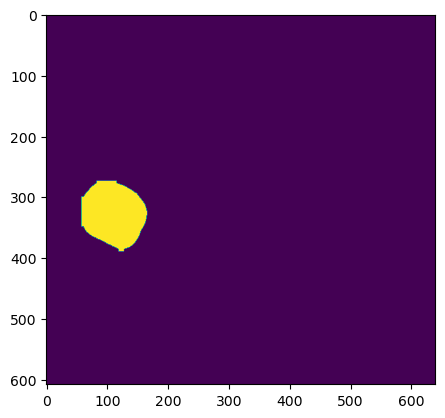

In [110]:
# results = model(sample_image2)

# box = results[0].boxes[0].xyxy[0]
# box = box.numpy().astype(int)

# # background subtraction
# mask = (results[0].masks.data[1].numpy() * 255).astype('uint8')
# plt.imshow(mask)


image 1/1 /Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/missing_sample.jpg: 608x640 13 Tooths, 116.2ms
Speed: 3.4ms preprocess, 116.2ms inference, 9.7ms postprocess per image at shape (1, 3, 608, 640)


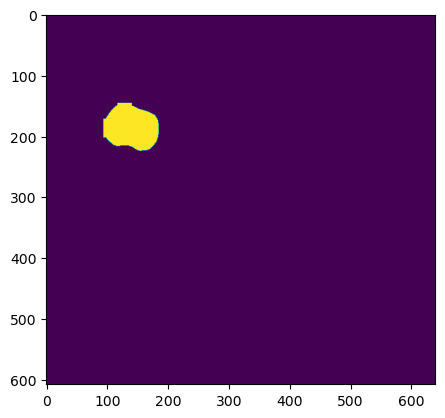

In [111]:
# results = model(sample_image2)

# box = results[0].boxes[0].xyxy[0]
# box = box.numpy().astype(int)

# # background subtraction
# mask = (results[0].masks.data[3].numpy() * 255).astype('uint8')
# plt.imshow(mask)


image 1/1 /Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/missing_sample.jpg: 608x640 13 Tooths, 105.9ms
Speed: 2.4ms preprocess, 105.9ms inference, 10.4ms postprocess per image at shape (1, 3, 608, 640)


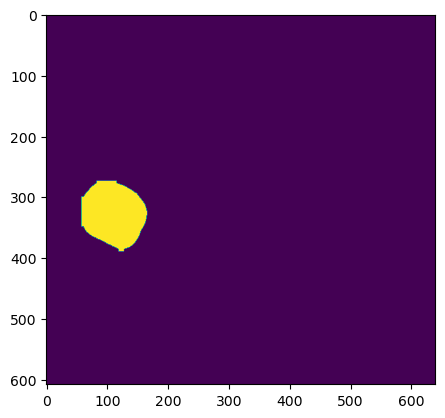

In [40]:
results = model(sample_image2)

box = results[0].boxes[0].xyxy[0]
box = box.numpy().astype(int)

# background subtraction
mask = (results[0].masks.data[1].numpy() * 255).astype('uint8')
plt.imshow(mask)

In [41]:
# Assume binary_mask is a 2D numpy array with dtype bool
centroid = np.mean(np.argwhere(mask),axis=0)
centroid_x, centroid_y = int(centroid[1]), int(centroid[0])
centroid_x,centroid_y

(110, 328)

In [42]:
centroid

array([     328.31,      110.08])

In [43]:
mask[centroid_y,centroid_x]=1
mask[centroid_y+1,centroid_x+1]=1
mask[centroid_y-1,centroid_x+1]=1
mask[centroid_y-1,centroid_x+1]=1


mask[centroid_y+2,centroid_x+2]=1
mask[centroid_y-2,centroid_x+2]=1
mask[centroid_y-2,centroid_x+2]=1

In [44]:
centroids=[]
for i in results[0].masks.data:
    mask = (i.numpy()*255).astype('uint8')
    mask = scale_image(mask, results[0].masks.orig_shape)
    centroid = np.mean(np.argwhere(mask),axis=0)
    centroid_x, centroid_y = int(centroid[1]), int(centroid[0])
    centroids.append([centroid_y,centroid_x])

In [45]:
centroids

[[580, 927],
 [563, 193],
 [733, 980],
 [314, 244],
 [713, 128],
 [333, 865],
 [102, 622],
 [110, 486],
 [430, 229],
 [153, 725],
 [134, 375],
 [233, 801],
 [207, 292]]

In [46]:
centroids = sorted(centroids,key= lambda x:x[1])

In [47]:
centroids

[[713, 128],
 [563, 193],
 [430, 229],
 [314, 244],
 [207, 292],
 [134, 375],
 [110, 486],
 [102, 622],
 [153, 725],
 [233, 801],
 [333, 865],
 [580, 927],
 [733, 980]]

In [48]:
def normalize_points(points):
    """
    Normalize the points to the range [0,1].

    :param points: A list of tuples [(x1, y1), (x2, y2), ..., (xn, yn)] representing the points.
    :return: A list of tuples representing the normalized points.
    """
    x_coords, y_coords = zip(*points)
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    
    normalized_points = [((x - x_min) / (x_max - x_min), (y - y_min) / (y_max - y_min)) for x, y in points]
    return normalized_points

In [49]:
normed_points = normalize_points(centroids)
normed_points

[(0.9683042789223455, 0.0),
 (0.7305863708399366, 0.07629107981220658),
 (0.5198098256735341, 0.11854460093896714),
 (0.3359746434231379, 0.13615023474178403),
 (0.1664025356576862, 0.19248826291079812),
 (0.05071315372424723, 0.289906103286385),
 (0.012678288431061807, 0.42018779342723006),
 (0.0, 0.57981220657277),
 (0.08082408874801902, 0.7007042253521126),
 (0.2076069730586371, 0.789906103286385),
 (0.36608557844690964, 0.8650234741784038),
 (0.757527733755943, 0.937793427230047),
 (1.0, 1.0)]

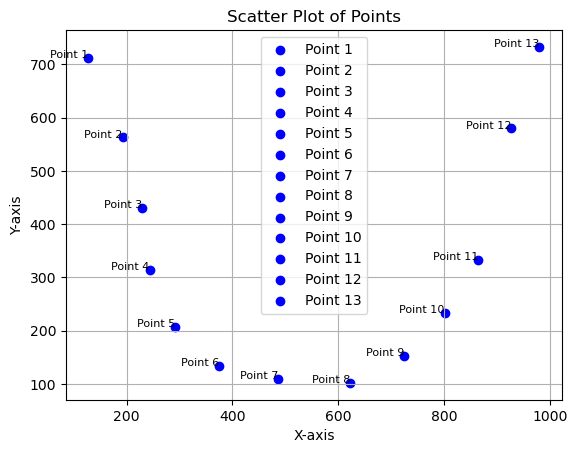

In [50]:
import matplotlib.pyplot as plt
x_coordinates = [point[1] for point in centroids]
y_coordinates = [point[0] for point in centroids]
point_names = [f'Point {i+1}' for i in range(len(centroids))]

# Plot the points
# plt.scatter(x_coordinates, y_coordinates, marker='o', color='blue', label='Points')
for i, name in enumerate(point_names):
    plt.scatter(x_coordinates[i], y_coordinates[i], marker='o', color='blue', label=name)
    plt.text(x_coordinates[i], y_coordinates[i], name, fontsize=8, ha='right')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()

In [123]:
import math

def calculate_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in 3D space.

    :param point1: A tuple (x1, y1, z1) representing the first point.
    :param point2: A tuple (x2, y2, z2) representing the second point.
    :return: The Euclidean distance between the two points.
    """
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

# # Example usage:
# point1 = (1, 2, 3)
# point2 = (4, 5, 6)
# distance = calculate_distance(point1, point2)
# print("The distance between the points is:", distance)


In [124]:
centroids[0]

[713, 128]

In [125]:
point1 = centroids[0]
point2 = centroids[1]
distance = calculate_distance(point1, point2)
print("The distance between the points is:", distance)

The distance between the points is: 163.47782724271815


In [126]:
import matplotlib.pyplot as plt

def plot_line_between_points_2d(point1, point2):
    """
    Plot a line between two points in 2D space.

    :param point1: A tuple (x1, y1) representing the first point.
    :param point2: A tuple (x2, y2) representing the second point.
    """
    x1, y1 = point1
    x2, y2 = point2

    # Create a new figure
    plt.figure()

    # Plot the points
    plt.scatter([x1, x2], [y1, y2], color='r')

    # Plot the line
    plt.plot([x1, x2], [y1, y2], color='b')

    # Set labels
    plt.xlabel('X axis')
    plt.ylabel('Y axis')

    # Show the plot
    plt.show()

# # Example usage:
# point1 = centroids[0]
# point2 = centroids[1]
# print(point1, point2)
# plot_line_between_points_2d(point1, point2)


In [127]:
import matplotlib.pyplot as plt

def plot_points_and_lines_2d(points):
    """
    Plot multiple points and lines connecting them in 2D space.

    :param points: A list of tuples [(x1, y1), (x2, y2), ..., (xn, yn)] representing the points.
    """
    # Unzip the list of points into two lists: x coordinates and y coordinates
    x_coords, y_coords = zip(*points)

    # Create a new figure
    plt.figure()

    # Plot the points
    plt.scatter(x_coords, y_coords, color='r')

    # Plot the lines connecting consecutive points
    plt.plot(x_coords, y_coords, color='b')

    # Set labels
    plt.xlabel('X axis')
    plt.ylabel('Y axis')

    # Show the plot
    plt.show()

# # Example usage:
# points = [(1, 2), (4, 5), (7, 8), (10, 11)]
# plot_points_and_lines_2d(points)


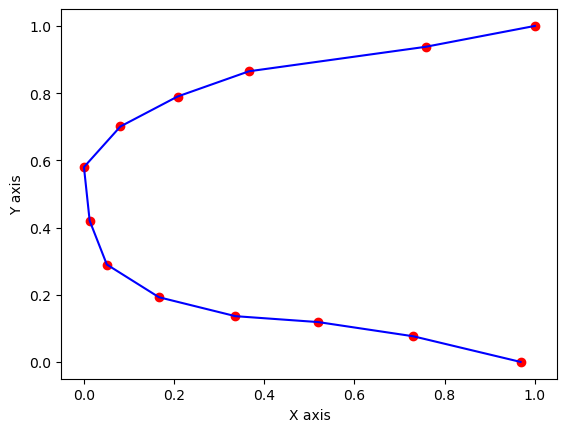

In [128]:
points = normed_points
plot_points_and_lines_2d(points)

In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import math

def calculate_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in 2D space.

    :param point1: A tuple (x1, y1) representing the first point.
    :param point2: A tuple (x2, y2) representing the second point.
    :return: The Euclidean distance between the two points.
    """
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

def plot_points_and_lines_with_distances(points):
    """
    Plot multiple points and lines connecting them in 2D space, showing distances between points.
    Save the distances in a DataFrame.

    :param points: A list of tuples [(x1, y1), (x2, y2), ..., (xn, yn)] representing the points.
    """
    # Unzip the list of points into two lists: x coordinates and y coordinates
    x_coords, y_coords = zip(*points)

    # Create a new figure
    plt.figure()

    # Plot the points
    plt.scatter(x_coords, y_coords, color='r')

    # Plot the lines connecting consecutive points and annotate distances
    distances = []
    for i in range(len(points) - 1):
        point1 = points[i]
        point2 = points[i + 1]
        distance = calculate_distance(point1, point2)
        distances.append(distance)
        
        # Plot the line
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='b')
        
        # Annotate the distance
        mid_x = (point1[0] + point2[0]) / 2
        mid_y = (point1[1] + point2[1]) / 2
        plt.text(mid_x, mid_y, f'{distance:.2f}', fontsize=9, ha='center')

    # Set labels
    plt.xlabel('X axis')
    plt.ylabel('Y axis')

    # Show the plot
    plt.show()

    # Save the distances in a DataFrame
    df = pd.DataFrame(distances, columns=['Distance'])
    print(df)
    return df, distances

# # Example usage:
# points = [(1, 2), (4, 5), (7, 8), (10, 11)]
# df = plot_points_and_lines_with_distances(points)


In [130]:
normed_points

[(0.9683042789223455, 0.0),
 (0.7305863708399366, 0.07629107981220658),
 (0.5198098256735341, 0.11854460093896714),
 (0.3359746434231379, 0.13615023474178403),
 (0.1664025356576862, 0.19248826291079812),
 (0.05071315372424723, 0.289906103286385),
 (0.012678288431061807, 0.42018779342723006),
 (0.0, 0.57981220657277),
 (0.08082408874801902, 0.7007042253521126),
 (0.2076069730586371, 0.789906103286385),
 (0.36608557844690964, 0.8650234741784038),
 (0.757527733755943, 0.937793427230047),
 (1.0, 1.0)]

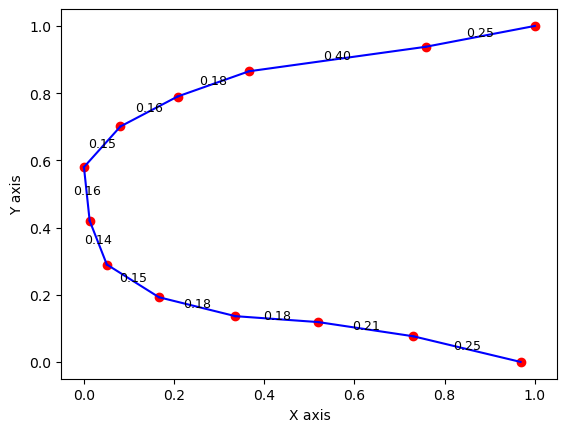

    Distance
0   0.249660
1   0.214970
2   0.184676
3   0.178686
4   0.151242
5   0.135720
6   0.160127
7   0.145422
8   0.155019
9   0.175380
10  0.398149
11  0.250325


In [144]:
points = normed_points
df, arr_distance = plot_points_and_lines_with_distances(points)

In [145]:
arr_distance

[0.2496600342105021,
 0.2149700259103444,
 0.18467629131709157,
 0.17868596237530965,
 0.15124241705151514,
 0.1357201892270488,
 0.16012711284975825,
 0.14542150297150896,
 0.15501894974847555,
 0.1753798385662985,
 0.39814874986632787,
 0.25032470432083276]

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def generate_keypoints_on_line(start, end, num_points):
    x_coords = np.linspace(start[0], end[0], num_points)
    y_coords = np.linspace(start[1], end[1], num_points)
    keypoints = np.vstack((x_coords, y_coords)).T
    return keypoints


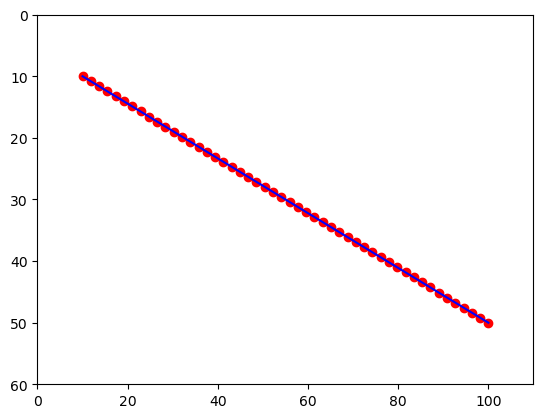

In [50]:
# Define the start and end points of the line
start = (10, 10)
end = (100, 50)

# Define the number of key points based on the length of the line
line_length = np.linalg.norm(np.array(end) - np.array(start))
num_points = int(line_length // 2) + 1  # Average distance of 2 units

keypoints = generate_keypoints_on_line(start, end, num_points)

# Visualize the line and key points
plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')  # Line
plt.scatter(keypoints[:, 0], keypoints[:, 1], c='red')  # Key points
plt.xlim(0, 110)
plt.ylim(0, 60)
plt.gca().invert_yaxis()  # To match usual image coordinates
plt.show()


In [53]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt

def generate_spline_keypoints(control_points, num_points):
    # tck, u = splprep(control_points.T, s=0)
    x = nodes[:,0]
    y = nodes[:,1]
    tck,u = splprep( [x,y], k = 2)
    u_new = np.linspace(0, 1, num_points)
    out = splev(u_new, tck)
    keypoints = np.vstack(out).T
    return keypoints

# Define control points for the spline
control_points = np.array([
    [0.0, 0.0],
    [0.5, 1.0],
    [1.0, 0.0]
])

# Number of key points
num_points = 36

keypoints = generate_spline_keypoints(control_points, num_points)

# Visualize the spline and key points
plt.plot(keypoints[:, 0], keypoints[:, 1], 'b-')  # Spline
plt.scatter(keypoints[:, 0], keypoints[:, 1], c='red')  # Key points
plt.plot(control_points[:, 0], control_points[:, 1], 'go--')  # Control points
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


NameError: name 'nodes' is not defined

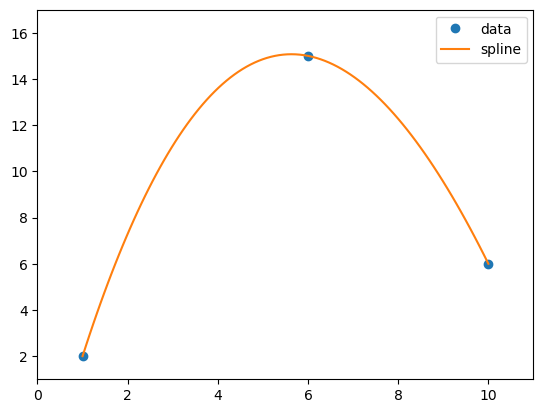

In [55]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate


nodes = np.array( [ [1, 2], [6, 15], [10, 6] ] )

x = nodes[:,0]
y = nodes[:,1]

tck,u = splprep( [x,y], k = 2)
xnew,ynew = interpolate.splev( np.linspace( 0, 1, 100 ), tck,der = 0)

plt.plot( x,y,'o' , xnew ,ynew )
plt.legend( [ 'data' , 'spline'] )
plt.axis( [ x.min() - 1 , x.max() + 1 , y.min() - 1 , y.max() + 2 ] )
plt.show()

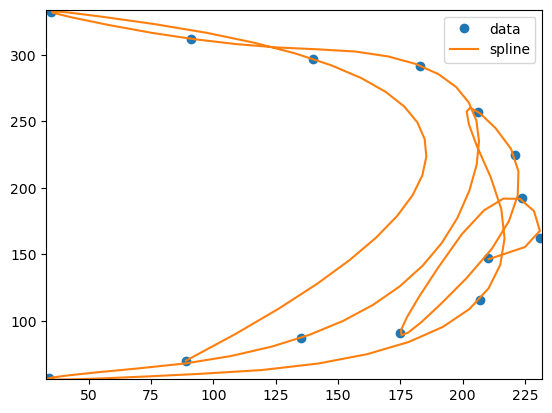

In [79]:
nodes = np.array(centroids)

x = nodes[:,0]
y = nodes[:,1]

tck,u = splprep( [x,y], k = 2)
xnew,ynew = interpolate.splev( np.linspace( 0, 1, 100 ), tck,der = 0)

plt.plot( x,y,'o' , xnew ,ynew )
plt.legend( [ 'data' , 'spline'] )
plt.axis( [ x.min() - 1 , x.max() + 1 , y.min() - 1 , y.max() + 2 ] )
plt.show()

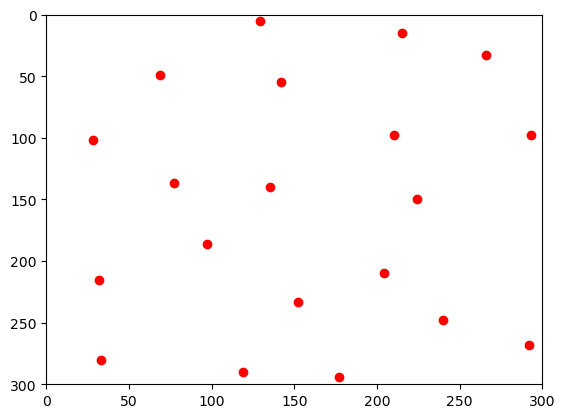

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_keypoints(width, height, min_distance, num_points):
    keypoints = []
    while len(keypoints) < num_points:
        new_point = np.random.randint(0, width, 2)
        if all(np.linalg.norm(new_point - kp) >= min_distance for kp in keypoints):
            keypoints.append(new_point)
    return np.array(keypoints)

# Parameters
width = 300  # width of the area
height = 300  # height of the area
min_distance = 50  # minimum distance between keypoints
num_points = 20  # number of keypoints

keypoints = generate_random_keypoints(width, height, min_distance, num_points)

# Visualize the keypoints
plt.scatter(keypoints[:, 0], keypoints[:, 1], c='red')
plt.xlim(0, width)
plt.ylim(0, height)
plt.gca().invert_yaxis()  # To match the usual image coordinates
plt.show()


In [35]:
mean_value = df['Distance'].mean()
print(mean_value)


0.19994798153458446


In [ ]:
upper_right = [11,12,13,14,15,16,17,18]
upper_left = [21,22,23,24,25,26,27,28]

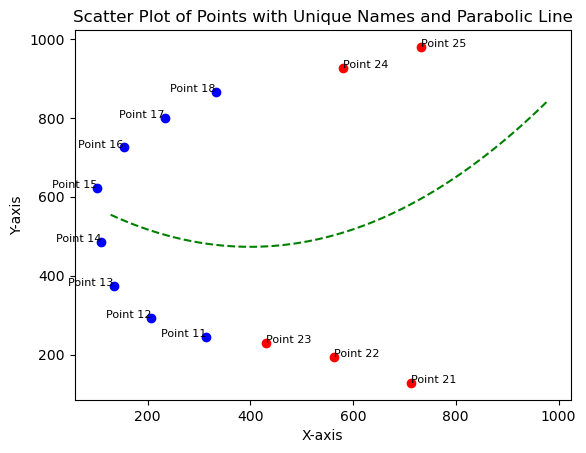

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
# data = np.array([[40, 67], [141, 99], [308, 128], [235, 132], [304, 192], [362, 222], [388, 269], [399, 329],
#                  [384, 388], [336, 433], [285, 489], [221, 524], [25, 537], [124, 549], [33, 549]])

# # Extract x and y coordinates
# x_coordinates = data[:, 0]
# y_coordinates = data[:, 1]
centroids = np.array(centroids)

# Fit a parabolic line
coefficients = np.polyfit(y_coordinates, x_coordinates, 2)
parabolic_line = np.poly1d(coefficients)

# Split the data into left and right quadrants
left_quadrant_data = centroids[centroids[:, 0] <= np.mean(y_coordinates)]
right_quadrant_data = centroids[centroids[:, 0] > np.mean(y_coordinates)]

# Plot the points with labels for the left quadrant
for i, point in enumerate(left_quadrant_data, start=11):
    plt.scatter(point[0], point[1], marker='o', color='blue', label=f'Point {i}')
    plt.text(point[0], point[1], f'Point {i}', fontsize=8, ha='right')

# Plot the points with labels for the right quadrant
for i, point in enumerate(right_quadrant_data, start=21):
    plt.scatter(point[0], point[1], marker='o', color='red', label=f'Point {i}')
    plt.text(point[0], point[1], f'Point {i}', fontsize=8, ha='left')

# Plot the parabolic line
x_values = np.linspace(min(x_coordinates), max(x_coordinates), 100)
plt.plot(x_values, parabolic_line(x_values), color='green', linestyle='--', label='Parabolic Line')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points with Unique Names and Parabolic Line')

# Show the plot
# plt.grid(True)
# plt.legend()
plt.show()


IndexError: list index out of range

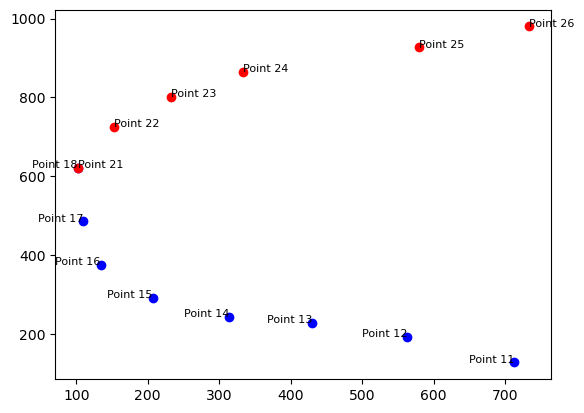

In [126]:
import matplotlib.pyplot as plt

# Your data
# data = [[40, 67], [141, 99], [308, 128], [235, 132], [304, 192], [362, 222], [388, 269], [399, 329],
#         [384, 388], [336, 433], [285, 489], [221, 524], [25, 537], [124, 549], [33, 549]]
data = centroids

# Assign unique names to points in the left and right quadrants
left_quadrant_names = [f'Point {i+11}' for i in range(8)]
right_quadrant_names = [f'Point {i+21}' for i in range(8)]

# Extract x and y coordinates
x_coordinates = [point[0] for point in data]
y_coordinates = [point[1] for point in data]

# Plot the points with labels in the left quadrant
for i, name in enumerate(left_quadrant_names):
    plt.scatter(x_coordinates[i], y_coordinates[i], marker='o', color='blue', label=name)
    plt.text(x_coordinates[i], y_coordinates[i], name, fontsize=8, ha='right')

# Plot the points with labels in the right quadrant
for i, name in enumerate(right_quadrant_names):
    plt.scatter(x_coordinates[i + 7], y_coordinates[i + 7], marker='o', color='red', label=name)
    plt.text(x_coordinates[i + 7], y_coordinates[i + 7], name, fontsize=8, ha='left')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points with Unique Names in Quadrants')

# Show the plot
plt.grid(True)
plt.show()


IndexError: list index out of range

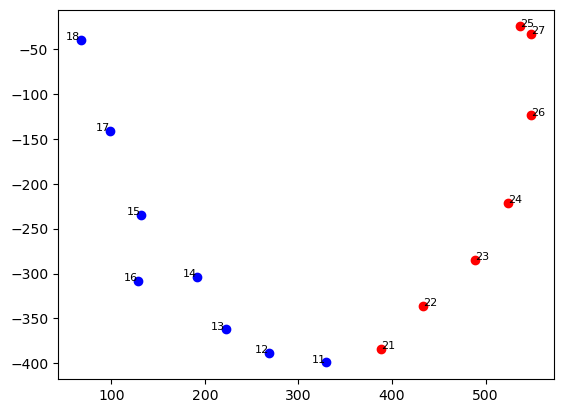

In [127]:
import matplotlib.pyplot as plt

# Your data
data = [[40, 67], [141, 99], [308, 128], [235, 132], [304, 192], [362, 222], [388, 269], [399, 329],
        [384, 388], [336, 433], [285, 489], [221, 524], [25, 537], [124, 549], [33, 549]]

# Swap x and y coordinates for rotation by 90 degrees
rotated_data = [[point[1], point[0]] for point in data]

# Assign unique names to points in the left and right quadrants
left_quadrant_names = [f'{i+11}' for i in range(8)][::-1]
right_quadrant_names = [f'{i+21}' for i in range(8)]

# Extract x and y coordinates
x_coordinates = [point[0] for point in rotated_data]
y_coordinates = [-point[1] for point in rotated_data]

# Plot the points with labels in the left quadrant
for i, name in enumerate(left_quadrant_names):
    plt.scatter(x_coordinates[i], y_coordinates[i], marker='o', color='blue', label=name)
    plt.text(x_coordinates[i], y_coordinates[i], name, fontsize=8, ha='right')

# Plot the points with labels in the right quadrant
for i, name in enumerate(right_quadrant_names):
    plt.scatter(x_coordinates[i + 8], y_coordinates[i + 8], marker='o', color='red', label=name)
    plt.text(x_coordinates[i + 8], y_coordinates[i + 8], name, fontsize=8, ha='left')

# Add labels and title
plt.xlabel('Y-axis')
plt.ylabel('X-axis')
plt.title('Scatter Plot of Points with Unique Names in Quadrants (Rotated by 90 Degrees)')

# Show the plot
plt.grid(True)
plt.show()


In [20]:
mask.shape

(672, 966, 1)

In [21]:
new_mask = np.zeros((448,640))
new_mask.shape

(448, 640)

In [22]:
len(centroids)

15

In [23]:
len(masks)

15

In [45]:
img =cv2.imread('./gECEdeQ5pWJvEQhC0wPYva-YtmvBTFhVS0nToWXY8To.jpeg')
boxes, masks, cls, probs = predict_on_image(model, img)

# overlay masks on original image
image_with_masks = np.copy(img)
cnt=0
for mask_i in masks:
    image_with_masks = overlay(image_with_masks, mask_i, color=(0,255,0), alpha=0.3)
# cv2.imshow('',image_with_masks)

WARNING ⚠️ 'source' is missing. Using 'source=/Users/khawaritzmi/miniforge3/envs/tooth_numbering-env/lib/python3.9/site-packages/ultralytics/assets'.

image 1/2 /Users/khawaritzmi/miniforge3/envs/tooth_numbering-env/lib/python3.9/site-packages/ultralytics/assets/bus.jpg: 640x480 7 Tooths, 137.5ms


[ WARN:0@1946.575] global loadsave.cpp:241 findDecoder imread_('./gECEdeQ5pWJvEQhC0wPYva-YtmvBTFhVS0nToWXY8To.jpeg'): can't open/read file: check file path/integrity


image 2/2 /Users/khawaritzmi/miniforge3/envs/tooth_numbering-env/lib/python3.9/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 73.5ms
Speed: 2.2ms preprocess, 105.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
(7, 640, 480)
(1080, 810, 7)


MaskError: Mask and data not compatible: data size is 1, mask size is 2624400.

In [57]:
len(masks)

15

In [60]:
centroids

[[40, 67],
 [141, 99],
 [308, 128],
 [235, 132],
 [304, 192],
 [362, 222],
 [388, 269],
 [399, 329],
 [384, 388],
 [336, 433],
 [285, 489],
 [221, 524],
 [25, 537],
 [124, 549],
 [33, 549]]

In [27]:
dental_namings = left_quadrant_names+right_quadrant_names
dental_namings

['18',
 '17',
 '16',
 '15',
 '14',
 '13',
 '12',
 '11',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28']

In [28]:
for i in range(len(masks)):
    cv2.putText(image_with_masks, dental_namings[i], (centroids[i][1],centroids[i][0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)


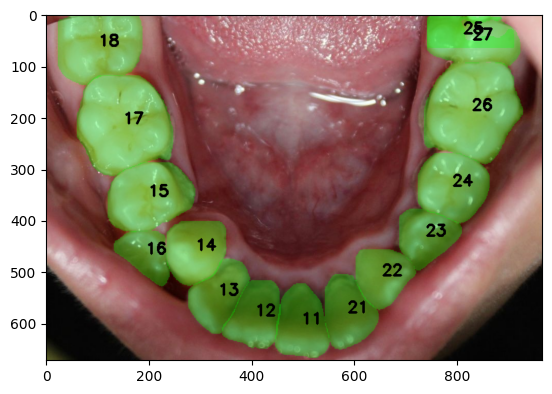

In [29]:
plt.imshow(cv2.cvtColor(image_with_masks, cv2.COLOR_BGR2RGB))

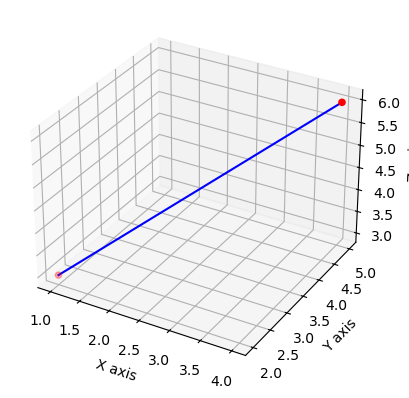

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_line_between_points(point1, point2):
    """
    Plot a line between two points in 3D space.

    :param point1: A tuple (x1, y1, z1) representing the first point.
    :param point2: A tuple (x2, y2, z2) representing the second point.
    """
    x1, y1, z1 = point1
    x2, y2, z2 = point2

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter([x1, x2], [y1, y2], [z1, z2], color='r')

    # Plot the line
    ax.plot([x1, x2], [y1, y2], [z1, z2], color='b')

    # Set labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.show()

# Example usage:
point1 = (1, 2, 3)
point2 = (4, 5, 6)
plot_line_between_points(point1, point2)


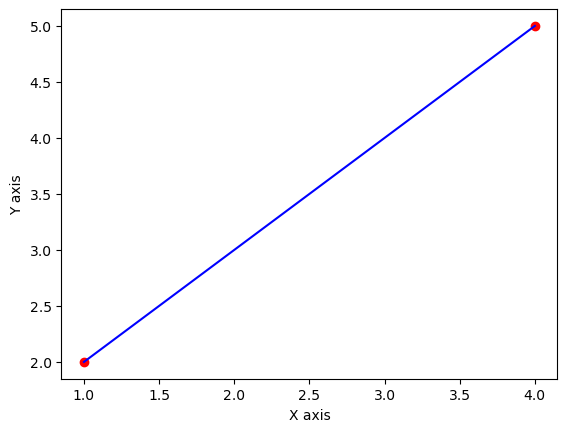

In [6]:
import matplotlib.pyplot as plt

def plot_line_between_points_2d(point1, point2):
    """
    Plot a line between two points in 2D space.

    :param point1: A tuple (x1, y1) representing the first point.
    :param point2: A tuple (x2, y2) representing the second point.
    """
    x1, y1 = point1
    x2, y2 = point2

    # Create a new figure
    plt.figure()

    # Plot the points
    plt.scatter([x1, x2], [y1, y2], color='r')

    # Plot the line
    plt.plot([x1, x2], [y1, y2], color='b')

    # Set labels
    plt.xlabel('X axis')
    plt.ylabel('Y axis')

    # Show the plot
    plt.show()

# Example usage:
point1 = (1, 2)
point2 = (4, 5)
plot_line_between_points_2d(point1, point2)


In [38]:
teeth_data = {}
for i in range(len(masks)):
    teeth_data[dental_namings[i]]={'centroid': (centroids[i][1],centroids[i][0])}


In [39]:
teeth_data

{'18': {'centroid': (102, 61)},
 '17': {'centroid': (150, 212)},
 '16': {'centroid': (194, 465)},
 '15': {'centroid': (199, 353)},
 '14': {'centroid': (291, 458)},
 '13': {'centroid': (335, 545)},
 '12': {'centroid': (407, 585)},
 '11': {'centroid': (497, 601)},
 '21': {'centroid': (587, 579)},
 '22': {'centroid': (654, 507)},
 '23': {'centroid': (739, 430)},
 '24': {'centroid': (791, 333)},
 '25': {'centroid': (812, 37)},
 '26': {'centroid': (829, 186)},
 '27': {'centroid': (830, 49)}}

In [47]:
len(masks[0])

672

In [48]:
teeth_data.keys()

dict_keys(['18', '17', '16', '15', '14', '13', '12', '11', '21', '22', '23', '24', '25', '26', '27'])

In [53]:
for j in teeth_data.keys():
    for i in results[0].masks.data:
        mask = (i.numpy()*255).astype('uint8')
        mask = scale_image(mask, results[0].masks.orig_shape)
        # print(mask.shape)
        centroid = np.mean(np.argwhere(mask),axis=0)
        centroid_x, centroid_y = int(centroid[1]), int(centroid[0])
        if centroid_x == teeth_data[j]['centroid'][0] and centroid_y ==teeth_data[j]['centroid'][1]:
            teeth_data[j]['mask']= mask
            break


In [50]:
teeth_data

{'18': {'centroid': (102, 61),
  'mask': array([[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         ...,
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]]], dtype=uint8)},
 '17': {'centroid': (150, 212),
  'mask': array([[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
    

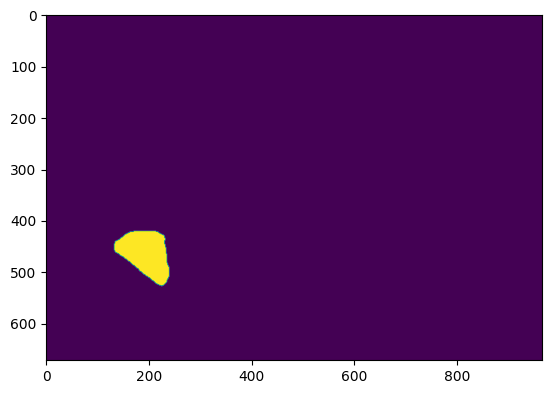

In [142]:
plt.imshow(mask)

In [92]:
mask.shape

(448, 640)

In [115]:
disease_model = YOLO('./GAIA/yolov8-streamlit-detection-tracking/weights/YOLOV8.pt')

In [116]:
res = disease_model('./dHnRq63rDPqfjvhgEa1Kt2bQVWzSnA-Sv6UtlDTNc98.jpeg')
res


image 1/1 D:\dHnRq63rDPqfjvhgEa1Kt2bQVWzSnA-Sv6UtlDTNc98.jpeg: 448x640 1 Fractured Teeth - Crown, 1 single tooth - bridge, 424.2ms
Speed: 8.0ms preprocess, 424.2ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Fractured Teeth - Crown', 1: 'Tooth Decay - Crown', 2: 'misaligned - aligner', 3: 'multiple tooth loss - implant', 4: 'single tooth - bridge', 5: 'spaced - aligner'}
 orig_img: array([[[109, 117, 116],
         [110, 118, 117],
         [112, 120, 119],
         ...,
         [172, 186, 204],
         [172, 186, 204],
         [173, 187, 205]],
 
        [[109, 117, 116],
         [111, 119, 118],
         [112, 120, 119],
         ...,
         [172, 186, 204],
         [173, 187, 205],
         [173, 187, 205]],
 
        [[110, 118, 117],
         [111, 119, 118],
         [112, 120, 119],
         ...,
         [174, 188, 206],
         [174, 188, 206],
         [174, 188, 206]],
 
        ...,
 
        [[167, 163, 198],
         [166, 162, 197],
         [165, 161, 196],
         ...,
         [167, 164, 196],
         [168, 165,

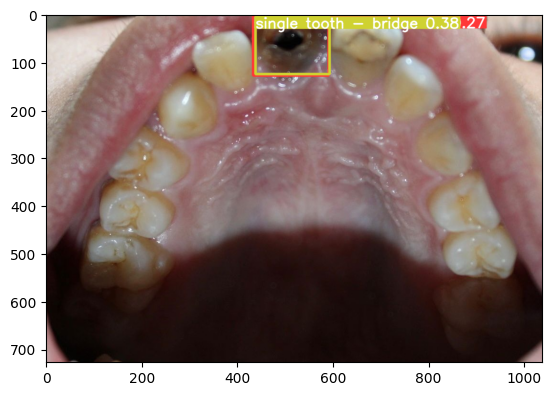

In [143]:

plt.imshow(cv2.cvtColor(res[0].plot(), cv2.COLOR_BGR2RGB))

In [188]:
img =cv2.imread('./dHnRq63rDPqfjvhgEa1Kt2bQVWzSnA-Sv6UtlDTNc98.jpeg')
boxes, masks, cls, probs = predict_on_image(model, img)

# overlay masks on original image
image_with_masks = np.copy(img)
for mask_i in masks:
    image_with_masks = overlay(image_with_masks, mask_i, color=(0,255,0), alpha=0.3)
# cv2.imshow('',image_with_masks)


0: 448x640 14 Tooths, 240.3ms
Speed: 0.0ms preprocess, 240.3ms inference, 24.0ms postprocess per image at shape (1, 3, 448, 640)


(14, 448, 640)
(727, 1038, 14)


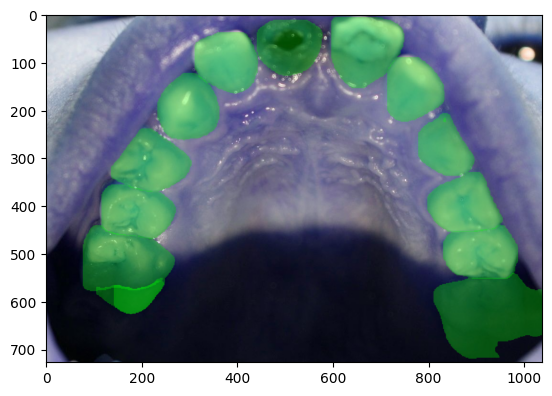

In [189]:
plt.imshow(image_with_masks)

In [105]:
centroids=[]
results = model('./dHnRq63rDPqfjvhgEa1Kt2bQVWzSnA-Sv6UtlDTNc98.jpeg')
for i in results[0].masks.data:
    mask = (i.numpy()*255).astype('uint8')
    mask = scale_image(mask, results[0].masks.orig_shape)
    centroid = np.mean(np.argwhere(mask),axis=0)
    centroid_x, centroid_y = int(centroid[1]), int(centroid[0])
    centroids.append([centroid_y,centroid_x])



image 1/1 D:\dHnRq63rDPqfjvhgEa1Kt2bQVWzSnA-Sv6UtlDTNc98.jpeg: 448x640 14 Tooths, 288.2ms
Speed: 16.0ms preprocess, 288.2ms inference, 24.0ms postprocess per image at shape (1, 3, 448, 640)


In [106]:
centroids = sorted(centroids,key= lambda x:x[1])

In [107]:
centroids

[[515, 160],
 [590, 176],
 [412, 187],
 [590, 188],
 [310, 219],
 [196, 297],
 [98, 378],
 [65, 508],
 [71, 666],
 [156, 767],
 [279, 833],
 [398, 875],
 [499, 911],
 [625, 924]]

In [193]:
len(centroids)

14

IndexError: list index out of range

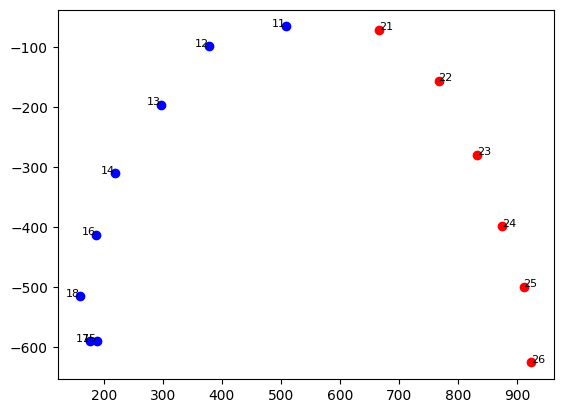

In [108]:
import matplotlib.pyplot as plt

# Your data
data = centroids
# Swap x and y coordinates for rotation by 90 degrees
rotated_data = [[point[1], point[0]] for point in data]

# Assign unique names to points in the left and right quadrants
left_quadrant_names = [f'{i+11}' for i in range(8)][::-1]
right_quadrant_names = [f'{i+21}' for i in range(8)]

# Extract x and y coordinates
x_coordinates = [point[0] for point in rotated_data]
y_coordinates = [-point[1] for point in rotated_data]

# Plot the points with labels in the left quadrant
for i, name in enumerate(left_quadrant_names):
    plt.scatter(x_coordinates[i], y_coordinates[i], marker='o', color='blue', label=name)
    plt.text(x_coordinates[i], y_coordinates[i], name, fontsize=8, ha='right')

# Plot the points with labels in the right quadrant
for i, name in enumerate(right_quadrant_names):
    plt.scatter(x_coordinates[i + 8], y_coordinates[i + 8], marker='o', color='red', label=name)
    plt.text(x_coordinates[i + 8], y_coordinates[i + 8], name, fontsize=8, ha='left')

# Add labels and title
plt.xlabel('Y-axis')
plt.ylabel('X-axis')
plt.title('Scatter Plot of Points with Unique Names in Quadrants (Rotated by 90 Degrees)')

# Show the plot
plt.grid(True)
plt.show()


In [156]:
len(centroids)

14

In [109]:
dental_namings = left_quadrant_names+right_quadrant_names
dental_namings

['18',
 '17',
 '16',
 '15',
 '14',
 '13',
 '12',
 '11',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28']

In [110]:
teeth_data = {}
for i in range(len(centroids)):
    teeth_data[dental_namings[i]]={'centroid': (centroids[i][1],centroids[i][0])}


In [111]:
for j in teeth_data.keys():
    for i in results[0].masks.data:
        mask = (i.numpy()*255).astype('uint8')
        mask = scale_image(mask, results[0].masks.orig_shape)
        # print(mask.shape)
        centroid = np.mean(np.argwhere(mask),axis=0)
        centroid_x, centroid_y = int(centroid[1]), int(centroid[0])
        if centroid_x == teeth_data[j]['centroid'][0] and centroid_y ==teeth_data[j]['centroid'][1]:
            teeth_data[j]['mask']= mask
            break


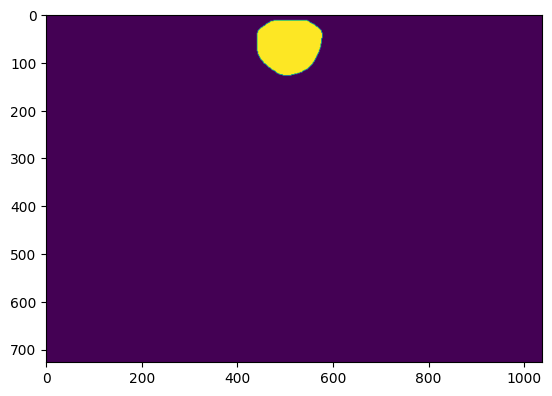

In [113]:
plt.imshow(teeth_data['11']['mask'])

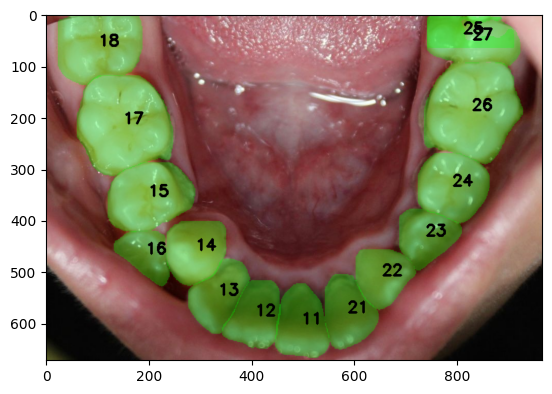

In [98]:
for i in range(len(masks)):
    cv2.putText(image_with_masks, dental_namings[i], (centroids[i][1],centroids[i][0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
plt.imshow(cv2.cvtColor(image_with_masks, cv2.COLOR_BGR2RGB))

In [132]:
for i in teeth_data.keys():
    teeth_data[i]['teeth_disease']= []
    teeth_data[i]['teeth_disease_coord'] = []

In [133]:
for detection in res[0].boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    vehicle_bounding_boxes=[]
    vehicle_bounding_boxes.append([x1, y1, x2, y2,class_id])
    center_dis = [int((x1+x2)//2),int((y1+y2)//2)]
    print(center_dis)
    for i in teeth_data.keys():
        if teeth_data[i]['mask'][center_dis[1]][center_dis[0]][0]==255:
            print("haer")
            teeth_data[i]['teeth_disease'].append(res[0].names[class_id])
            teeth_data[i]['teeth_disease_coord'].append(center_dis)


    # FOR VISUALIZATION

    # for bbox in vehicle_bounding_boxes:
    #     cv2.rectangle(image_with_masks, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 255), 3)
    #     cv2.putText(image_with_masks, res[0].names[class_id], [int(x1),int(y1)+30], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
    # break


    

[516, 65]
haer
[512, 66]
haer


In [135]:
teeth_data

{'18': {'centroid': (160, 515),
  'mask': array([[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         ...,
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]]], dtype=uint8),
  'teeth_disease': [],
  'teeth_disease_coord': []},
 '17': {'centroid': (176, 590),
  'mask': array([[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
  
         [[0],
          [0],
          [0],
          ...,
          [0],


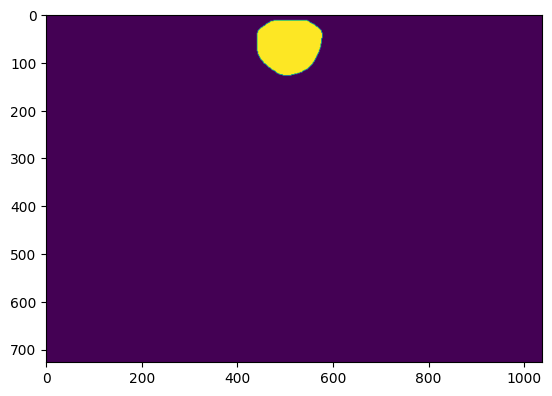

In [114]:
plt.imshow(teeth_data['11']['mask'])

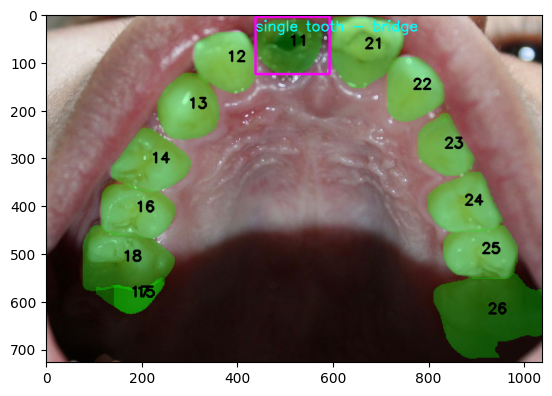

In [198]:
plt.imshow(cv2.cvtColor(image_with_masks, cv2.COLOR_BGR2RGB))

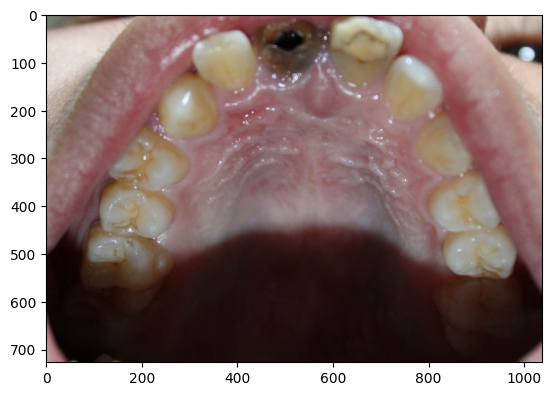

In [202]:
from PIL import Image

img = Image.open('./dHnRq63rDPqfjvhgEa1Kt2bQVWzSnA-Sv6UtlDTNc98.jpeg')
plt.imshow(img)

In [61]:
import os
import cv2 

path_to_test = r"/Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images"

image1 = "/Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/base/upper_perfect.png"
image2 = "/Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/missing_sample.jpg"

def findMissingObj(image1_base, image2_to_be_compared):

    # read images
    img1 = cv2.imread(os.path.join(path_to_test, image1_base)) 
    img2 = cv2.imread(os.path.join(path_to_test, image2_to_be_compared))

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    #sift
    sift = cv2.SIFT_create()

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

    #feature matching
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

    # return img3

    # Write output images
    name = 'SIFT_'  + '.jpg'
    print(name)
    cv2.imwrite(os.path.join(path_to_test, name),img3)



In [64]:
import os 
import cv2
import numpy as np
from skimage.measure import compare_ssim
from image_tools.sizes import resize_and_crop

def findMissingObj(image1_base, image2_to_be_compared):

    # load the two input images
    imageA = cv2.imread(os.path.join(path_to_test, image1_base)) 
    #Image.open(os.path.join(path_to_test, image1_base))

    # Expected size
    size = (imageA.shape[1], imageA.shape[0])

    imageB = np.array(resize_and_crop(os.path.join(path_to_test, image2_to_be_compared), size, "middle"))
    imageB = np.array(imageB[...,::-1])

    # convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    print("SSIM: {}".format(score))

    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # loop over the contours
    for c in cnts:
        # compute the bounding box of the contour and then draw the
        # bounding box on both input images to represent where the two images differ
        if cv2.contourArea(c) > cv2.arcLength(c, True):
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 4)

    # Write output images
    name =  'SSIM_' + image2.split('.')[0] + '_VS_' + image1.split('.')[0] + '.jpg'
    cv2.imwrite(os.path.join(path_to_test, name),imageB)

ImportError: cannot import name 'compare_ssim' from 'skimage.measure' (/Users/khawaritzmi/miniforge3/envs/tooth_numbering-env/lib/python3.9/site-packages/skimage/measure/__init__.py)

In [ ]:
findMissingObj(image1,image2)

In [6]:
arr = []
for i in range(16):
    arr.append(0)

In [7]:
len(arr)

16

In [ ]:
tooth_number_dict_right = {
    11: 0,
    12: 0,
    13: 0,
    14: 0,
    15: 0,
    16: 0,
    17: 0,
    18: 0,
}

tooth_number_dict_left = {
    21: 0,
    22: 0,
    23: 0,
    24: 0,
    25: 0,
    26: 0,
    27: 0,
    28: 0,
}

In [ ]:
tooth_distance_right = {
    "11-12": 6,
    "12-13": 5,
    "13-14": 4,
    "14-15": 3,
    "15-16": 2,
    "16-17": 1,
    "17-18": 0,
    "18-end-ru": 0,
}

tooth_distance_right = {
    "21-22": 6,
    "22-23": 5,
    "23-24": 4,
    "24-25": 3,
    "25-26": 2,
    "26-27": 1,
    "27-28": 0,
    "28-end-lu": 0,
}

In [94]:
import random

# Function to generate synthetic distances between teeth
def generate_tooth_distances(num_teeth):
    distances = []
    for i in range(num_teeth - 1):
        distance = round(random.uniform(0.1, 2.0), 2)  # Random distance between 0.1 and 2.0
        distances.append(distance)
    return distances

# Example usage
num_teeth = 36  # Assuming a full set of adult teeth (including wisdom teeth)
tooth_distances = generate_tooth_distances(num_teeth)

print(tooth_distances)


[1.98, 1.76, 1.26, 1.62, 1.19, 1.85, 1.99, 1.21, 1.54, 0.39, 0.62, 0.75, 1.92, 0.77, 1.47, 1.75, 0.54, 1.83, 0.91, 1.35, 0.28, 0.98, 0.91, 1.46, 1.47, 0.43, 1.38, 1.05, 1.0, 0.35, 0.53, 0.11, 1.1, 1.03, 1.1]


In [95]:
len(tooth_distances)

35

In [157]:
arr_distance

[0.2496600342105021,
 0.2149700259103444,
 0.18467629131709157,
 0.17868596237530965,
 0.15124241705151514,
 0.1357201892270488,
 0.16012711284975825,
 0.14542150297150896,
 0.15501894974847555,
 0.1753798385662985,
 0.39814874986632787,
 0.25032470432083276]

In [146]:
distance = arr_distance
new_distance = []

In [147]:
total = 0
for i in distance:
    total+=i

print(total/len(distance))    

0.19994798153458446


In [163]:
def calculate_harmonic_mean(data):
    n = len(data)
    reciprocal_sum = sum(1 / x for x in data)
    return n / reciprocal_sum

# Example list of distances
distances = [0.5, 1.0, 1.5, 2.0]

# Calculate harmonic mean
h_mean = calculate_harmonic_mean(distances)

print(f"The harmonic mean of the distances is: {h_mean}")

The harmonic mean of the distances is: 0.9600000000000002


In [164]:
# Calculate harmonic mean
h_mean = calculate_harmonic_mean(distance)

print(f"The harmonic mean of the distances is: {h_mean}")

The harmonic mean of the distances is: 0.18340401111873


In [152]:
avg_distance = total/len(distance)

In [162]:
for i in distance:
    print((i - avg_distance))

0.049712052675917634
0.015022044375759935
-0.01527169021749289
-0.02126201915927481
-0.048705564483069314
-0.06422779230753567
-0.039820868684826205
-0.05452647856307549
-0.04492903178610891
-0.024568142968285966
0.1982007683317434
0.0503767227862483


In [165]:
avg_distance = h_mean

In [166]:
for i in distance:
    if i > avg_distance:
        _p = round(i/avg_distance) + 1
        for j in range(_p):
            new_distance.append(1)
    else:
        new_distance.append(1)

In [167]:
new_distance

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [155]:
print(len(new_distance), len(distance))

17 12


In [156]:
print(total)

2.3993757784150134


In [168]:
def calculate_proportions(distances, bounding_box_distance):
    proportions = [distance / bounding_box_distance for distance in distances]
    return proportions

# Example distances between teeth
tooth_distances = [0.5, 1.0, 1.5, 2.0]

# Example bounding box distance
bounding_box_distance = sum(tooth_distances)  # Assuming the bounding box distance is the sum of all distances

# Calculate proportions
proportions = calculate_proportions(tooth_distances, bounding_box_distance)

print("Distances:", tooth_distances)
print("Bounding Box Distance:", bounding_box_distance)
print("Proportions:", proportions)


Distances: [0.5, 1.0, 1.5, 2.0]
Bounding Box Distance: 5.0
Proportions: [0.1, 0.2, 0.3, 0.4]


In [13]:
import random

# Function to generate synthetic distances between teeth
def generate_tooth_distances(num_teeth):
    distances = []
    for i in range(num_teeth - 1):
        distance = round(random.uniform(0.1, 2.0), 2)  # Random distance between 0.1 and 2.0
        distances.append(distance)
    return distances

# Function to detect loose teeth based on abnormal distances
def detect_loose_teeth(distances, threshold_factor=1.5):
    avg_distance = sum(distances) / len(distances)
    loose_teeth_indices = []

    new_distance = []
    
    for i, distance in enumerate(distances):
        if distance > avg_distance * threshold_factor:
            num_tooth_lose = round(distance/avg_distance)
            for j in range(num_tooth_lose):
                new_distance.append(distance/avg_distance)
                if j != 0:
                    loose_teeth_indices.append(new_distance.index(distance/avg_distance)+j)
        else:
            new_distance.append(distance)

    
    return loose_teeth_indices, new_distance

# # Generate synthetic data
# num_teeth = 32  # Assuming a full set of adult teeth (including wisdom teeth)
# tooth_distances = generate_tooth_distances(num_teeth)

# # Detect loose teeth
# threshold_factor = 1.5  # Adjust the threshold factor as needed
# loose_teeth_indices = detect_loose_teeth(tooth_distances, threshold_factor)


# print("Tooth Distances:", tooth_distances)
# print("Loose Teeth Indices:", loose_teeth_indices)


In [194]:
# Generate synthetic data
num_teeth = 16  # Assuming a full set of adult teeth (including wisdom teeth)
tooth_distances = generate_tooth_distances(num_teeth)

# Detect loose teeth
threshold_factor = 1.5  # Adjust the threshold factor as needed
loose_teeth_indices = detect_loose_teeth(tooth_distances, threshold_factor)


print("Tooth Distances:", tooth_distances)
print("Loose Teeth Indices:", loose_teeth_indices)

Tooth Distances: [0.23, 0.69, 0.13, 0.11, 1.76, 1.03, 1.69, 1.15, 1.97, 1.24, 0.9, 0.64, 0.86, 0.38, 1.88]
Loose Teeth Indices: [4, 6, 8, 14]


In [186]:
distance

[0.2496600342105021,
 0.2149700259103444,
 0.18467629131709157,
 0.17868596237530965,
 0.15124241705151514,
 0.1357201892270488,
 0.16012711284975825,
 0.14542150297150896,
 0.15501894974847555,
 0.1753798385662985,
 0.39814874986632787,
 0.25032470432083276]

In [200]:
import numpy as np

# Given data
tooth_distances = [0.2496600342105021, 0.2149700259103444, 0.18467629131709157, 0.17868596237530965, 
                   0.15124241705151514, 0.1357201892270488, 0.16012711284975825, 0.14542150297150896, 
                   0.15501894974847555, 0.1753798385662985, 0.6814874986632787, 0.25032470432083276]

# Calculate the average distance
avg_distance = np.mean(tooth_distances)

# Calculate the standard deviation
std_deviation = np.std(tooth_distances)

# Set a threshold factor (can be adjusted based on sensitivity requirements)
threshold_factor = 2  # Example value, adjust based on how sensitive you want the detection

# Calculate the threshold
threshold = avg_distance + (threshold_factor * std_deviation)

print(f"Average Distance: {avg_distance}")
print(f"Standard Deviation: {std_deviation}")
print(f"Threshold: {threshold}")

# Detect loose teeth
loose_teeth_indices = [i for i, distance in enumerate(tooth_distances) if distance > threshold]

print("Loose Teeth Indices:", loose_teeth_indices)


Average Distance: 0.2235595439343304
Standard Deviation: 0.1428252981491747
Threshold: 0.5092101402326797
Loose Teeth Indices: [10]


In [197]:
_distances = [1.2, 1.3, 5, 1.7]

In [198]:
# Detect loose teeth
threshold_factor = 1.5  # Adjust the threshold factor as needed
loose_teeth_indices = detect_loose_teeth(_distances, threshold_factor)


print("Tooth Distances:", _distances)
print("Loose Teeth Indices:", loose_teeth_indices)

Tooth Distances: [1.2, 1.3, 5, 1.7]
Loose Teeth Indices: [2]


In [ ]:
tooth_distance_right = {
    6: 
}

In [27]:
# Given data
tooth_distances = [0.2496600342105021, 0.2149700259103444, 0.18467629131709157, 0.1868596237530965, 
                   0.15124241705151514, 0.1357201892270488, 0.16012711284975825, 0.14542150297150896, 
                   0.15501894974847555, 0.1753798385662985, 0.39814874986632787, 0.25032470432083276]

In [28]:
# # Generate synthetic data
# num_teeth = 16  # Assuming a full set of adult teeth (including wisdom teeth)
# tooth_distances = generate_tooth_distances(num_teeth)

# Detect loose teeth
threshold_factor = 1.5  # Adjust the threshold factor as needed
loose_teeth_indices, new_distance = detect_loose_teeth(tooth_distances, threshold_factor)



print("Tooth Distances:", tooth_distances)
print("Loose Teeth Indices:", loose_teeth_indices)
print(new_distance)
print(len(tooth_distances), len(new_distance))

Tooth Distances: [0.2496600342105021, 0.2149700259103444, 0.18467629131709157, 0.1868596237530965, 0.15124241705151514, 0.1357201892270488, 0.16012711284975825, 0.14542150297150896, 0.15501894974847555, 0.1753798385662985, 0.39814874986632787, 0.25032470432083276]
Loose Teeth Indices: [11]
[0.2496600342105021, 0.2149700259103444, 0.18467629131709157, 0.1868596237530965, 0.15124241705151514, 0.1357201892270488, 0.16012711284975825, 0.14542150297150896, 0.15501894974847555, 0.1753798385662985, 1.9845013022067461, 1.9845013022067461, 0.25032470432083276]
12 13
